## Heart Failure 
### Team members ->  Himanish Prakash, Eduardo Saavedra, &  Shiv Goel


In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import tensorflow
from tensorflow import keras





In [51]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [52]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [53]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

## Exploratory data analysis

<Axes: xlabel='sex', ylabel='count'>

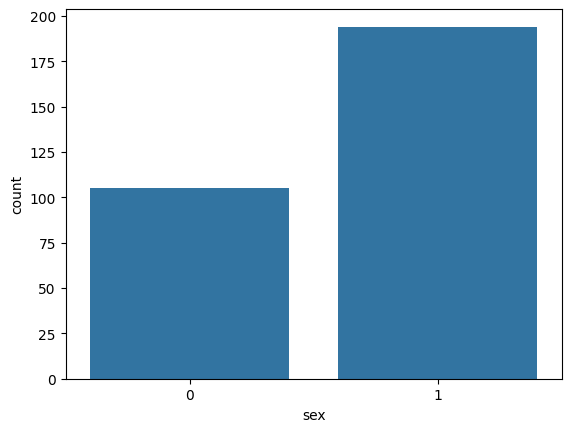

In [54]:
sns.countplot(df, x='sex')

### we could see that there are more male in the data, compare to females

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

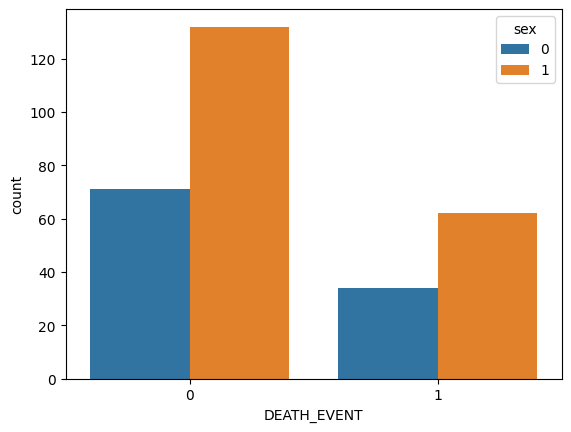

In [55]:
sns.countplot(df, x='DEATH_EVENT', hue='sex')

<Axes: xlabel='DEATH_EVENT', ylabel='platelets'>

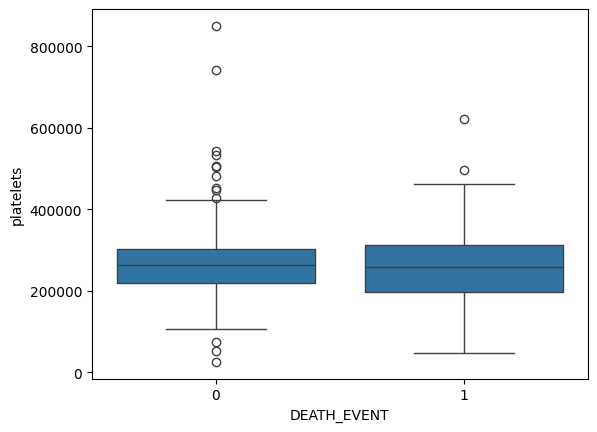

In [56]:
sns.boxplot(df, x="DEATH_EVENT", y ="platelets")

#### Based on the box plot analysis, it appears that the average platelet counts for individuals who survived are similar to those who did not. However, there is a notable difference in the number of outliers, with survivors displaying a greater variance in platelet counts compared to those who passed away.

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

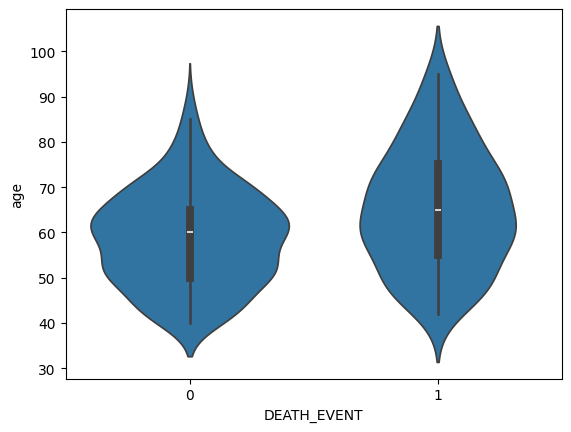

In [57]:
sns.violinplot(df, x="DEATH_EVENT", y="age")

## we could see that average age of people who survived is around 60 while for the those who didn't survived is more than 60(around mid sixties)

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

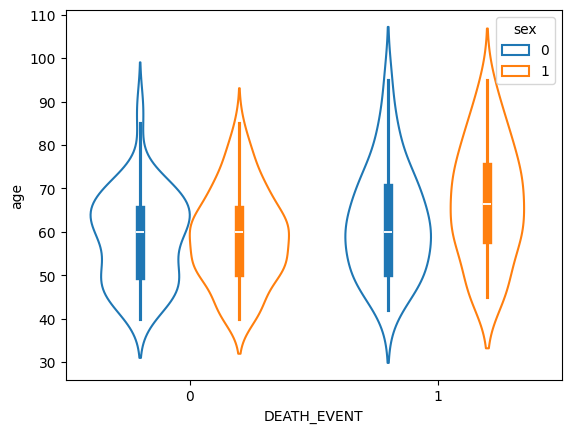

In [58]:
sns.violinplot(df, x="DEATH_EVENT", y="age",hue = "sex",fill=False)

####  The median age and the spread of ages are relatively consistent across groups, there is a subtle indication that those who did not survive might be slightly older on average, and there are a few notable age outliers among the survivors

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

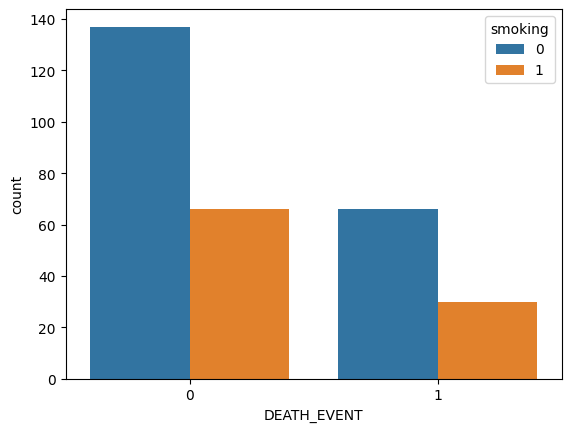

In [59]:
sns.countplot(df, x='DEATH_EVENT', hue='smoking')

<Axes: >

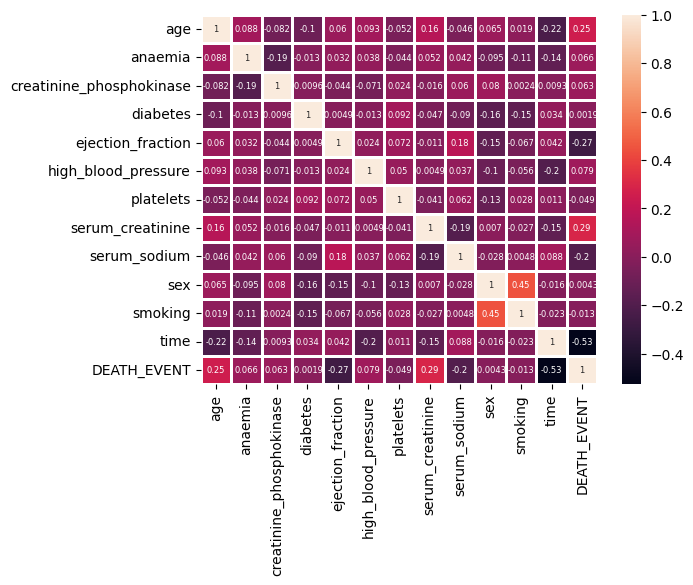

In [60]:
cormat = df.corr()
sns.heatmap(cormat, annot=True, linewidths=1, annot_kws={"size":6})

#### Based on the correlation plot we could see that time, smoking , serum_sodium, ejection fraction and platelets has negative correlation with Death event. Rest all variable has a positive correlation with Death_event

## Logistic Regression

In [61]:
def clean_data(df):
    '''In this function we are replacing column names with _ if there is a space in the column names.
    Changing all the column names to lower case'''
    df.columns = df.columns.str.replace(' ','_')
    df.columns = df.columns.str.lower()
    
    return df

In [62]:
cleaned_df =clean_data(df)

In [63]:
cleaned_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [64]:
def standard_x_y(data):
    '''In this function we are spliting the data set and normalizing the x variables'''
    
    scaler = StandardScaler()
    y = data['death_event']
    x = data.drop(columns='death_event')
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    x_new = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return x_new, X_test, y_train, y_test,x,y
        

In [65]:
x_new, X_test, y_train, y_test,x,y = standard_x_y(cleaned_df)

In [66]:
logistic_reg = LogisticRegression()
# Fit the model
logistic_reg.fit(x_new, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test)


In [96]:
## defining the k value(number of split for the data)
KFold = 5
## calculating accuracy of each splits 
accuracy_test = cross_val_score(logistic_reg,x_new,y_train,cv=KFold,scoring='accuracy')
## taking the mean of all the 5 splits
accuracy_test = np.mean(accuracy_test)
print("Average Accuracy for logistic regression using k-fold = {}".format(accuracy_test))
test_accuracy_logis = accuracy_score(y_test,y_pred)
print('Test accuracy for logistic regression: ',test_accuracy_logis)

Average Accuracy for logistic regression using k-fold = 0.8322695035460992
Test accuracy for logistic regression:  0.8


In [68]:
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred))
print()
print('Classification report')
print(classification_report(y_test,y_pred))



Confusion matrix
[[34  1]
 [11 14]]

Classification report
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60



## Lasso Logistic

In [69]:
## applying the lasso penalty to the logistic regression
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')

lasso_model.fit(x_new, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model for six components
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
print(accuracy_lasso)

0.8166666666666667


In [104]:
## defining the k value(number of split for the data)
KFold = 5
## calculating accuracy of each splits 
accuracy_test_lasso = cross_val_score(lasso_model,x_new,y_train,cv=KFold,scoring='accuracy')
## taking the mean of all the 5 splits
accuracy_test_lasso = np.mean(accuracy_test_lasso)
print("Average Accuracy for lasso logistic regression using k-fold = {}".format(accuracy_test_lasso))
test_accuracy_lasso = accuracy_score(y_test,y_pred_lasso)
print('Test accuracy for lasso logistic regression: ',test_accuracy_lasso)

Average Accuracy for logistic regression using k-fold = 0.836613475177305
Test accuracy for lasso logistic regression:  0.8166666666666667


In [71]:
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_lasso))
print()
print('Classification report')
print(classification_report(y_test,y_pred_lasso))

Confusion matrix
[[34  1]
 [10 15]]

Classification report
              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60



## K-NN

In [72]:
## empty list to store accuracy score for each n values
accuracy_list = []
## storing the error rate for each n values
error_rate = []
## iterating the for each n values from 1 to 11
for i in range(1,11):
    knn_classifier = KNeighborsClassifier(n_neighbors= i)
    knn_classifier.fit(x_new,y_train)
    y_pred_knn = knn_classifier.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    accuracy_list.append((i,accuracy_knn))
    error_rate.append((i,np.mean(y_pred_knn != y_test)))

## converting the list to the data frame for accuracy and error rate
accuracy_knn_df = pd.DataFrame(accuracy_list,columns=['Number_neighbors', 'accuracy_score'])
error_rate  = pd.DataFrame(error_rate,columns=['Number_neighbors', 'error_rate'])
print('Accuracy Score for KNN')
print(accuracy_knn_df)    
print()
print('Error rate for KNN')
print(error_rate)

Accuracy Score for KNN
   Number_neighbors  accuracy_score
0                 1        0.700000
1                 2        0.650000
2                 3        0.733333
3                 4        0.683333
4                 5        0.683333
5                 6        0.683333
6                 7        0.683333
7                 8        0.633333
8                 9        0.683333
9                10        0.650000

Error rate for KNN
   Number_neighbors  error_rate
0                 1    0.300000
1                 2    0.350000
2                 3    0.266667
3                 4    0.316667
4                 5    0.316667
5                 6    0.316667
6                 7    0.316667
7                 8    0.366667
8                 9    0.316667
9                10    0.350000


<Axes: xlabel='Number_neighbors', ylabel='error_rate'>

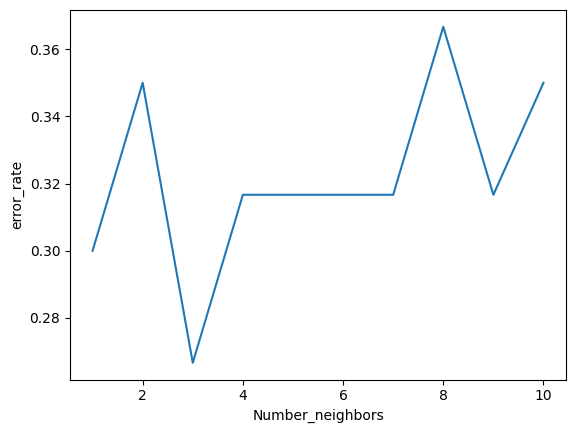

In [73]:
sns.lineplot(error_rate,x='Number_neighbors',y= 'error_rate')

<Axes: xlabel='Number_neighbors', ylabel='accuracy_score'>

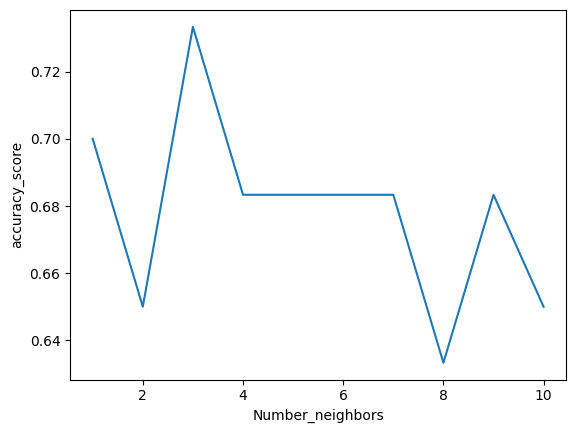

In [74]:
sns.lineplot(accuracy_knn_df,x='Number_neighbors',y= 'accuracy_score')

### Based on the Error rate and accuracy score, we can choose n = 3

In [105]:
knn_classifier = KNeighborsClassifier(n_neighbors= 3)
knn_classifier.fit(x_new,y_train)
y_pred_knn = knn_classifier.predict(X_test)
## defining the k value(number of split for the data)
KFold = 5
## calculating accuracy of each splits 
accuracy_test_knn = cross_val_score(knn_classifier,x_new,y_train,cv=KFold,scoring='accuracy')
## taking the mean of all the 5 splits
accuracy_test_knn = np.mean(accuracy_test_knn)
print("Average Accuracy for K-nearest neigbour using k-fold = {}".format(accuracy_test_knn))
test_accuracy_knn = accuracy_score(y_test,y_pred_knn)
print('Test accuracy for K-nearest neigbour : ',test_accuracy_knn)

Average Accuracy for logistic regression using k-fold = 0.7320921985815604
Test accuracy for K-nearest neigbour regression:  0.7333333333333333


In [76]:
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_knn))
print()
print('Classification report')
print(classification_report(y_test,y_pred_knn))

Confusion matrix
[[34  1]
 [15 10]]

Classification report
              precision    recall  f1-score   support

           0       0.69      0.97      0.81        35
           1       0.91      0.40      0.56        25

    accuracy                           0.73        60
   macro avg       0.80      0.69      0.68        60
weighted avg       0.78      0.73      0.70        60



## Decision Tree 

In [77]:
dct = DecisionTreeClassifier()
dct.fit(x_new,y_train )
y_pred_dct = dct.predict(X_test)


In [106]:
## defining the k value(number of split for the data)
KFold = 5
## calculating accuracy of each splits 
accuracy_test_dct = cross_val_score(dct,x_new,y_train,cv=KFold,scoring='accuracy')
## taking the mean of all the 5 splits
accuracy_test_dct = np.mean(accuracy_test_dct)
print("Average Accuracy for Decision tree using k-fold = {}".format(accuracy_test_dct))
test_accuracy_dct = accuracy_score(y_test,y_pred_dct)
print('Test accuracy for Decision tree: ',test_accuracy_dct)

Average Accuracy for logistic regression using k-fold = 0.7783687943262411
Test accuracy for Decision tree:  0.65


In [79]:
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_dct))
print()
print('Classification report')
print(classification_report(y_test,y_pred_dct))

Confusion matrix
[[27  8]
 [13 12]]

Classification report
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        35
           1       0.60      0.48      0.53        25

    accuracy                           0.65        60
   macro avg       0.64      0.63      0.63        60
weighted avg       0.64      0.65      0.64        60



## Random Forest

In [80]:
random_classifier = RandomForestClassifier()
random_classifier.fit(x_new,y_train)

y_pred_rfc = random_classifier.predict(X_test)

In [107]:
## defining the k value(number of split for the data)
KFold = 5
## calculating accuracy of each splits 
accuracy_test_rfc = cross_val_score(random_classifier,x_new,y_train,cv=KFold,scoring='accuracy')
## taking the mean of all the 5 splits
accuracy_test_rfc = np.mean(accuracy_test_rfc)
print("Average Accuracy for Random forest using k-fold = {}".format(accuracy_test_rfc))
test_accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
print('Test accuracy for Random forest: ',test_accuracy_rfc)

Average Accuracy for Random forest using k-fold = 0.874645390070922
Test accuracy for Random forest:  0.75


In [82]:
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_rfc))
print()
print('Classification report')
print(classification_report(y_test,y_pred_rfc))

Confusion matrix
[[33  2]
 [13 12]]

Classification report
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



## XGBoost

In [83]:
xgboost = XGBClassifier()
xgboost.fit(x_new,y_train)

y_pred_xgboost = xgboost.predict(X_test)

In [108]:
## defining the k value(number of split for the data)
KFold = 5
## calculating accuracy of each splits 
accuracy_test_xgboost = cross_val_score(xgboost,x_new,y_train,cv=KFold,scoring='accuracy')
## taking the mean of all the 5 splits
accuracy_test_xgboost = np.mean(accuracy_test_xgboost)
print("Average Accuracy for Random forest using k-fold = {}".format(accuracy_test_xgboost))
test_accuracy_xgboost = accuracy_score(y_test,y_pred_xgboost)
print('Test accuracy for Random forest: ',test_accuracy_xgboost)

Average Accuracy for Random forest using k-fold = 0.8495567375886525
Test accuracy for Random forest:  0.7666666666666667


In [85]:
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred_xgboost))
print()
print('Classification report')
print(classification_report(y_test,y_pred_xgboost))

Confusion matrix
[[31  4]
 [10 15]]

Classification report
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.79      0.60      0.68        25

    accuracy                           0.77        60
   macro avg       0.77      0.74      0.75        60
weighted avg       0.77      0.77      0.76        60



## Neural Network

In [86]:
## Spliting the data for neural network
X_neural_train, X_neural_test, y_neural_train, y_neural_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [89]:
'''Creating the hidden layers for the neural network, IN the First layer we have use 64 neurons and used the 'relu' activation function.
In the second layer, we have used 32 neurons and used the relu activation function
In the last layer we have used sigmoid activation function because we want have two desired outputs either 0 or 1'''
model = keras.Sequential([
    keras.layers.Dense(units=64, activation='relu', input_shape=(x_new.shape[1],)),
    keras.layers.Dense(units = 32,activation='relu'),
    keras.layers.Dense(units=1, activation='softmax')
])

##Compile the model
model.compile(optimizer='adam', loss= tensorflow.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'] )

# Training the model
history = model.fit(X_neural_train, y_neural_train, epochs=10 )
test_loss, test_acc = model.evaluate(X_neural_test, y_neural_test)


Epoch 1/10


/Users/himanishprakash/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/himanishprakash/Library/Python/3.9/lib/python/site-packages/keras/src/losses/losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/Users/himanishprakash/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2886 - loss: 0.0000e+00  
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.2918 - loss: 0.0000e+00
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 604us/step - accuracy: 0.2864 - loss: 0.0000e+00
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.2626 - loss: 0.0000e+00
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.3008 - loss: 0.0000e+00
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.2841 - loss: 0.0000e+00
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3050 - loss: 0.0000e+00 
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.3009 - loss: 0.0000e+00
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.3094 - loss: 0.0000e+00
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.2684 - loss: 0.0000e+00
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4132 - loss: 0.0000e+00 


In [90]:
print(f'Test Accuracy: {test_acc}')

Test Accuracy: 0.4166666567325592


### Neural network using Sklearn Library

In [91]:


# Initialize the MLPClassifier
# Using two hidden layers with 64 and 32 neurons respectively, and 'relu' as the activation function
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_neural_train, y_neural_train)

# Predict on the test set
y_pred_mlp = mlp.predict(X_neural_test)

# Evaluate the model
accuracy_mlp = accuracy_score(y_neural_test, y_pred_mlp)



In [111]:
print('Accuracy score of neural network: ',accuracy_mlp)

Accuracy score of neural network:  0.5833333333333334


In [94]:
print('Confusion matrix')
print(confusion_matrix(y_neural_test,y_pred_mlp))
print()
print('Classification report')
print(classification_report(y_neural_test,y_pred_mlp))

Confusion matrix
[[35  0]
 [25  0]]

Classification report
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60



/Users/himanishprakash/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/himanishprakash/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/himanishprakash/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta